# Introdução

## Importação das bibliotecas necessarias

In [1]:
%matplotlib inline
import requests
import pandas as pd
import os
import json
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
import numpy as np
import ipywidgets as widgets
import glob, os
sns.set()

## Pegar o CSV do Indicador, Estados e Municípios

Aqui é utilizado o indicador "Proporção de nascidos vivos de mulheres com idade inferior a 20 anos (gestação na adolescência)"

In [2]:
csvs = glob.glob(os.path.join('./csv_files/*.csv'))
df_csvs = pd.DataFrame(csvs,columns=['Indicadores'])

In [3]:
indicadores = df_csvs['Indicadores'].map(lambda x: x.lstrip('./csv_files/').rstrip('.csv'))
df_indicadores = pd.DataFrame(indicadores,columns=['Indicadores'])

In [4]:
ano_esc = int( input("Diga ano que deseja visualizar: \n") )

Diga ano que deseja visualizar: 
 2016


In [5]:
indicador_select = widgets.Dropdown(
    options=df_indicadores['Indicadores'].values,
    value='Q-01-proporcao_gravidez_idade_menor_que_20',
    description='Indicadores:',
    disabled=False,
)
display(indicador_select)

Dropdown(description='Indicadores:', index=29, options=('QR-29-taxa_fecundidade_20_34', 'QR-30-taxa_fecundidad…

In [14]:
indicador_select.value
nome_arquivo_indicador = indicador_select.value
arquivo_indicador= df_csvs[df_csvs['Indicadores'].str.contains(indicador_select.value)]['Indicadores'].values[0]
print(arquivo_indicador)

./csv_files/QW-23-taxa_de_mortalidade_neonatal_precoce.csv


In [16]:
df = pd.read_csv(arquivo_indicador)
df_estados = pd.read_csv('./csv_files/Estados.csv')
df_municipios = pd.read_csv('./csv_files/Municipios.csv')
df_pop_fem_10_49 = pd.read_csv('./tabelas_tabnet/mulheres_10_49_por_municipio_limpa.csv', ';')


In [17]:
coluna_codigo = df.columns[0] 
ano =           df.columns[1] 
indicador =     df.columns[2]
total =         df.columns[3]
ratio =         df.columns[4]
print(coluna_codigo,ano,indicador,total,ratio)

CODMUNRES Ano Qtd_Neonatal_Precoce Qtd_Total Ratio


## Solução do problema de 2019 vazio

In [18]:

years = []
for col in df_pop_fem_10_49:
    if col != 'Municipio':
        years.append(col)

all_entries = []
for index, row in df_pop_fem_10_49.iterrows():
    row_array = row.values.tolist()
    for i in range(len(row_array)):
        if i != 0:
            pop = row_array[i]
            if pop == '-':
                pop = row_array[i+1]
            all_entries.append([row_array[0], years[i-1], int(pop)])

            
df_pop_fem_10_49_by_codmunres = pd.DataFrame(all_entries, columns=[coluna_codigo, ano, 'Pop'])
del df_pop_fem_10_49_by_codmunres['Pop']

# do a right join
df_pop_fem_10_49_by_codmunres[coluna_codigo] = df_pop_fem_10_49_by_codmunres[coluna_codigo].astype(str)
df_pop_fem_10_49_by_codmunres[ano] = df_pop_fem_10_49_by_codmunres[ano].astype(str)
df[coluna_codigo] = df[coluna_codigo].astype(str)
df[ano] = df[ano].astype(str)
df_merge = pd.merge(df, df_pop_fem_10_49_by_codmunres, on=[coluna_codigo,ano], how='right')
df_merge = df_merge.fillna(0)
df = df_merge
df[ano] = df[ano].astype(int)
df[coluna_codigo] = df[coluna_codigo].astype(int)

df


,CODMUNRES,Ano,Qtd_Neonatal_Precoce,Qtd_Total,Ratio
0,110001,2012,2.0,386.0,5.181347
1,110001,2013,1.0,382.0,2.617801
2,110001,2014,0.0,341.0,0.000000
3,110001,2015,1.0,373.0,2.680965
4,110001,2016,1.0,326.0,3.067485
...,...,...,...,...,...
44555,530010,2015,135.0,46122.0,2.927020
44556,530010,2016,120.0,43340.0,2.768805
44557,530010,2017,143.0,44568.0,3.208580
44558,530010,2018,146.0,44195.0,3.303541


In [19]:
df_municipios[coluna_codigo] = df_municipios[coluna_codigo].astype(str)
f2d = df_municipios[coluna_codigo].str.extract('([0-9]{2})', expand=False)
df_municipios['COD_UF'] = f2d.astype(int)
df_municipios

,res_MUNNOME,CODMUNRES,COD_UF
0,Município ignorado - RO,110000,11
1,Alta Floresta D'Oeste,110001,11
2,Ariquemes,110002,11
3,Cabixi,110003,11
4,Cacoal,110004,11
...,...,...,...
5579,Vianópolis,522200,52
5580,Vicentinópolis,522205,52
5581,Vila Boa,522220,52
5582,Vila Propício,522230,52


In [20]:
estados_select = widgets.Dropdown(
    options=df_estados['res_NOME_UF'].values,
    value='MINAS GERAIS',
    description='Estados:',
    disabled=False,
)
display(estados_select)

Dropdown(description='Estados:', index=16, options=('RONDONIA', 'ACRE', 'AMAZONAS', 'RORAIMA', 'PARA', 'AMAPA'…

In [21]:
nome_estado = estados_select.value
print(int(df.drop_duplicates(subset=[coluna_codigo]).shape[0]),'Municípios registrados no país')

5570 Municípios registrados no país


In [22]:
anos = [2012,2013,2014,2015,2016,2017,2018,2019]
print(anos)

for i in anos:
    aux = df[df[ano]==i]
    aux1 = aux[aux[total]<100]
    print('Ano: ',i,' Municipios com menos de 100 registros no total: ', aux1.shape[0])

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Ano:  2012  Municipios com menos de 100 registros no total:  2116
Ano:  2013  Municipios com menos de 100 registros no total:  2162
Ano:  2014  Municipios com menos de 100 registros no total:  2106
Ano:  2015  Municipios com menos de 100 registros no total:  2119
Ano:  2016  Municipios com menos de 100 registros no total:  2194
Ano:  2017  Municipios com menos de 100 registros no total:  2138
Ano:  2018  Municipios com menos de 100 registros no total:  2120
Ano:  2019  Municipios com menos de 100 registros no total:  2160


In [23]:
uf_selecionada = df_estados[df_estados['res_NOME_UF']==estados_select.value]['COD_UF'].values[0]
municipios_uf = df_municipios[df_municipios['COD_UF'] == uf_selecionada]
novo_municipios_uf = df_municipios[df_municipios['COD_UF'] == uf_selecionada]

municipios_select = widgets.Dropdown(
    options=municipios_uf['res_MUNNOME'].values,
    value=municipios_uf['res_MUNNOME'].values[0],
    description='Municipio:',
    disabled=False,
)

subset_nao_ignorado = df[df[coluna_codigo]%10000 != 0]

df1 = municipios_uf
df2 = subset_nao_ignorado

df1 = df1.astype({coluna_codigo: int})
result = pd.merge(df2, df1 ,on=[coluna_codigo])

uf_selecionada = df_estados[df_estados['res_NOME_UF']==estados_select.value]['COD_UF'].values[0]
result = result[result['COD_UF'] == uf_selecionada]

droped_duplicates = result.drop_duplicates(subset=['res_MUNNOME'])

municipios_select = widgets.Dropdown(
    options=droped_duplicates['res_MUNNOME'].values,
    value=droped_duplicates['res_MUNNOME'].values[0],
    description='Municipio:',
    disabled=False,
)

display(municipios_select)

Dropdown(description='Municipio:', options=('Angra dos Reis', 'Aperibé', 'Araruama', 'Areal', 'Armação dos Búz…

In [24]:
cod_municipio  = municipios_uf[municipios_uf['res_MUNNOME'] == municipios_select.value][coluna_codigo].values[0]
cod_estado = int(str(cod_municipio)[:2])
nome_municipio = municipios_select.value

cod_municipio

'330455'

In [25]:
subset_mun = subset_nao_ignorado[subset_nao_ignorado[coluna_codigo] == int( cod_municipio )]
subset_mun.head(10)

,CODMUNRES,Ano,Qtd_Neonatal_Precoce,Qtd_Total,Ratio
25936,330455,2012,330.0,86549.0,3.812869
25937,330455,2013,357.0,87661.0,4.072507
25938,330455,2014,302.0,89991.0,3.355891
25939,330455,2015,342.0,90694.0,3.770922
25940,330455,2016,331.0,83166.0,3.979992
25941,330455,2017,264.0,84521.0,3.123484
25942,330455,2018,277.0,82554.0,3.355380
25943,330455,2019,259.0,76803.0,3.372264


In [26]:
nome_indicador = nome_arquivo_indicador.split('-')[2].replace('_',' ').upper()
print(nome_indicador)

TAXA DE MORTALIDADE NEONATAL PRECOCE


## Gráficos por município

### Plot em Stacked Bar do município escolhido considerando os valores absolutos

Aqui são plotadas as barras de Quantidade do Indicador e Quantidade Fora do Indicador, o que permite visualizar os valores absolutos para cada ano no município escolhido.

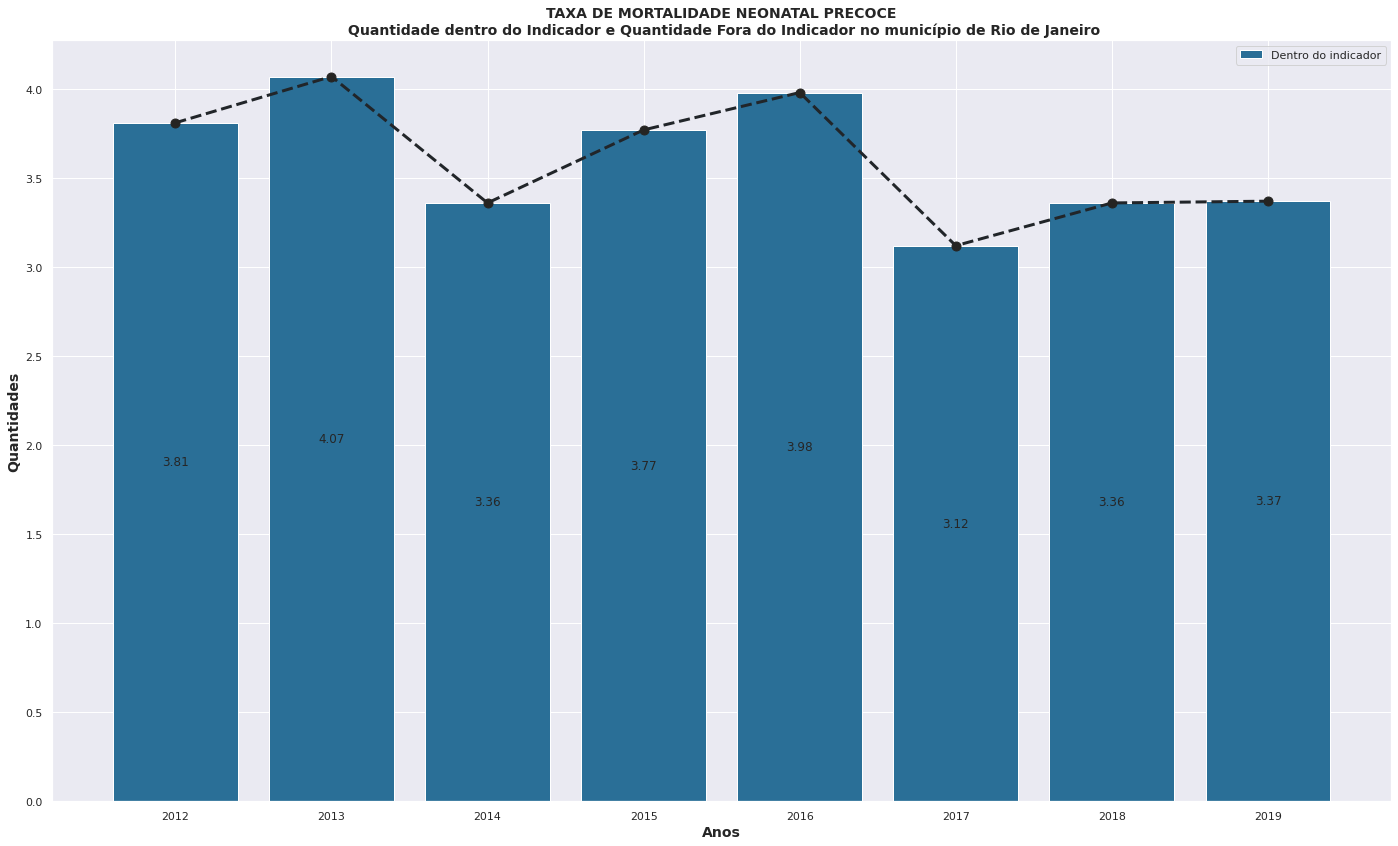

In [27]:
fig, ax = plt.subplots(figsize=(24, 14))

plt.plot(subset_mun[ano],np.round(subset_mun[ratio],decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529')
#p1=ax.bar( subset_mun[ano], subset_mun[total] - subset_mun[indicador], bottom=subset_mun[indicador], color ='#a9d6e5', label = 'Fora do indicador')
p2=ax.bar( subset_mun[ano], np.round(subset_mun[ratio],decimals=2), color ='#2a6f97', label = 'Dentro do indicador')

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

plt.title(nome_indicador+ "\n Quantidade dentro do Indicador e Quantidade Fora do Indicador no município de "+nome_municipio,**font)
plt.xlabel('Anos',**font)
plt.ylabel('Quantidades',**font)

'''
for i in range(8):
    height = int(p1[i].get_height() + p2[i].get_height())
    plt.text(p1[i].get_x() + p1[i].get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom')

ax.bar_label(p1,label_type="center")
'''
ax.bar_label(p2,label_type="center")
ax.legend()

plt.show()

In [28]:
subset_mun.head()

,CODMUNRES,Ano,Qtd_Neonatal_Precoce,Qtd_Total,Ratio
25936,330455,2012,330.0,86549.0,3.812869
25937,330455,2013,357.0,87661.0,4.072507
25938,330455,2014,302.0,89991.0,3.355891
25939,330455,2015,342.0,90694.0,3.770922
25940,330455,2016,331.0,83166.0,3.979992


### Plot em Stacked Bar do município escolhido considerando as proporções

Aqui são plotadas as barras de Proporção dentro do Indicador e Proporção Fora do Indicador, o que permite visualizar a proporção para cada ano no município escolhido.

No handles with labels found to put in legend.


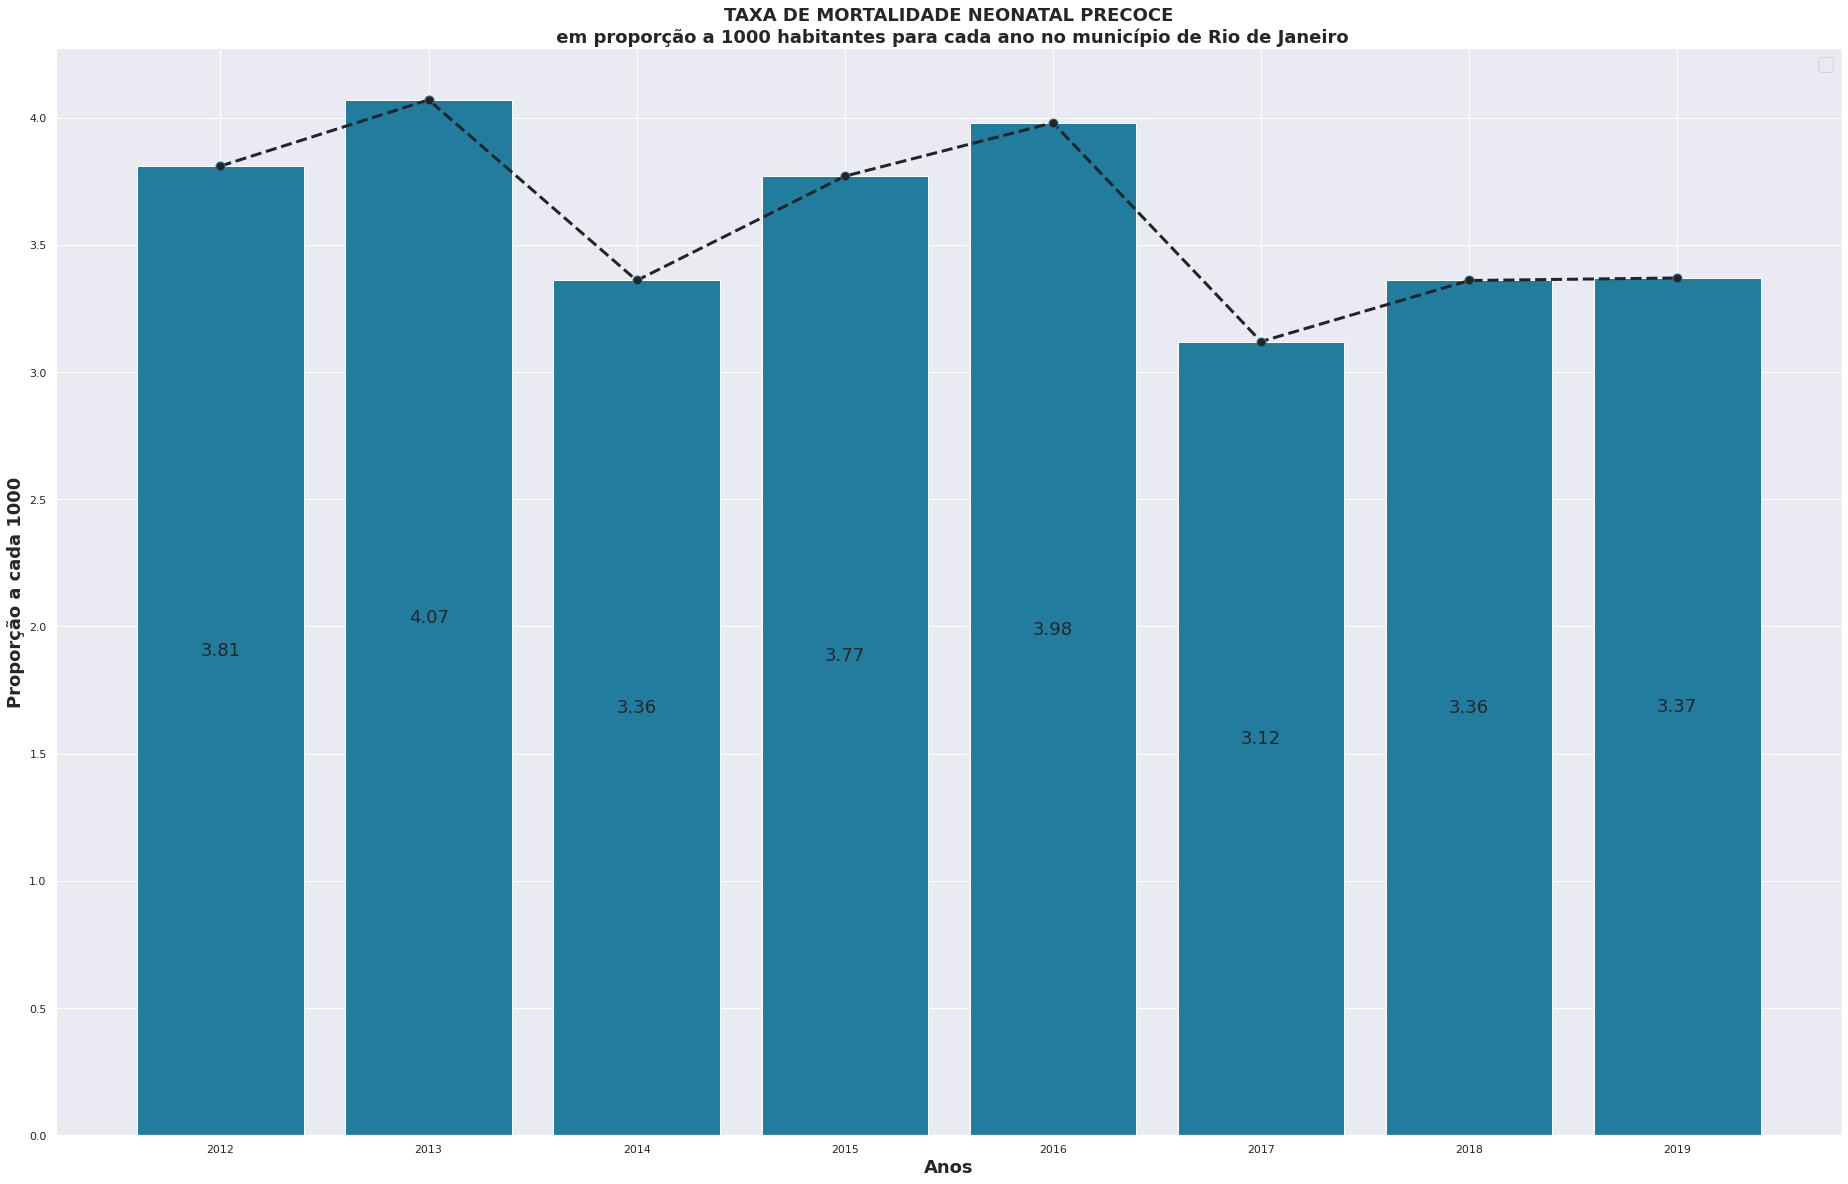

In [30]:
# Falta mostrar dentro desse gráfico a média Estadual, Regional e Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(subset_mun[ano],np.round(subset_mun[ratio],decimals=2),'.--',markersize=18,mec='#227c9d',mfc='#252422',linewidth=3,color='#212529')

#p1 = ax.bar(subset_mun[ano],  np.round(100 - 100*subset_mun[ratio], decimals=2) , bottom= np.round(100*subset_mun[ratio], decimals=2), color ='#F1E9E5', label = 'Fora do indicador')
#p2 = ax.bar(subset_mun[ano],  np.round(100*subset_mun[ratio], decimals=2), color ='#368B85', label = 'Dentro do indicador' )
p2=ax.bar( subset_mun[ano], np.round(subset_mun[ratio],decimals=2), color ='#227c9d')


font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em proporção a 1000 habitantes para cada ano no município de " + nome_municipio, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Proporção a cada 1000',**font)

#if(subset_mun[total].mean()<100):
 #   plt.text(0.03, 1.1, 'Esse município possui em média menos de 100 registros em cada ano', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center", fontsize = 18 )
ax.legend(loc='upper right', fontsize = 18 )

plt.savefig('./Imagens/10-grafico1', bbox_inches='tight')
plt.show()

### Plot em Stacked Bar do estado que o município escolhido pertence considerando as proporções

Aqui serão calculadas os números acumulados de registros em relação a estado e país para cada ano, para que depois possam ser analisadas as proporções. Essa célula pode ser necessária antes, visto que precisamos mostrar tanto o quartil que o estado se encontra em relação ao país, quanto o quartil que um município em específico de encontra em relação ao estado.

In [34]:
subset_nao_ignorado = subset_nao_ignorado.astype({coluna_codigo: str})
subset_nao_ignorado[ano] =       subset_nao_ignorado[ano].astype(int)
subset_nao_ignorado[indicador] = subset_nao_ignorado[indicador].astype(int)
subset_nao_ignorado[total] =     subset_nao_ignorado[total].astype(int)

f2d = subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{2})', expand=False)
df_grouped_by_state = subset_nao_ignorado.groupby([f2d, ano], as_index=True).agg({indicador:'sum', total:'sum'})
df_grouped_by_state.reset_index(inplace=True)
df_grouped_by_state.rename(columns = {coluna_codigo:'COD_UF'}, inplace = True)
df_grouped_by_state[ratio] = np.round(1000*(df_grouped_by_state[indicador]/df_grouped_by_state[total]),decimals=2)
df_grouped_by_state['COD_UF'] = df_grouped_by_state['COD_UF'].astype(int)

numero_municipios_estado = int(droped_duplicates['res_MUNNOME'].shape[0])

df_estado_acumulado = df_grouped_by_state[df_grouped_by_state['COD_UF']==cod_estado]

print(numero_municipios_estado, 'Municípios com mais de 100 registros no estado',nome_estado,'para o indicador',nome_indicador,'\n')
print(df_estado_acumulado)

92 Municípios com mais de 100 registros no estado RIO DE JANEIRO para o indicador TAXA DE MORTALIDADE NEONATAL PRECOCE 

     COD_UF   Ano  Qtd_Neonatal_Precoce  Qtd_Total  Ratio
144      33  2012                   883     222837   3.96
145      33  2013                   868     224008   3.87
146      33  2014                   901     233569   3.86
147      33  2015                   873     236946   3.68
148      33  2016                   869     219124   3.97
149      33  2017                   788     223216   3.53
150      33  2018                   784     220481   3.56
151      33  2019                   756     207966   3.64


No handles with labels found to put in legend.


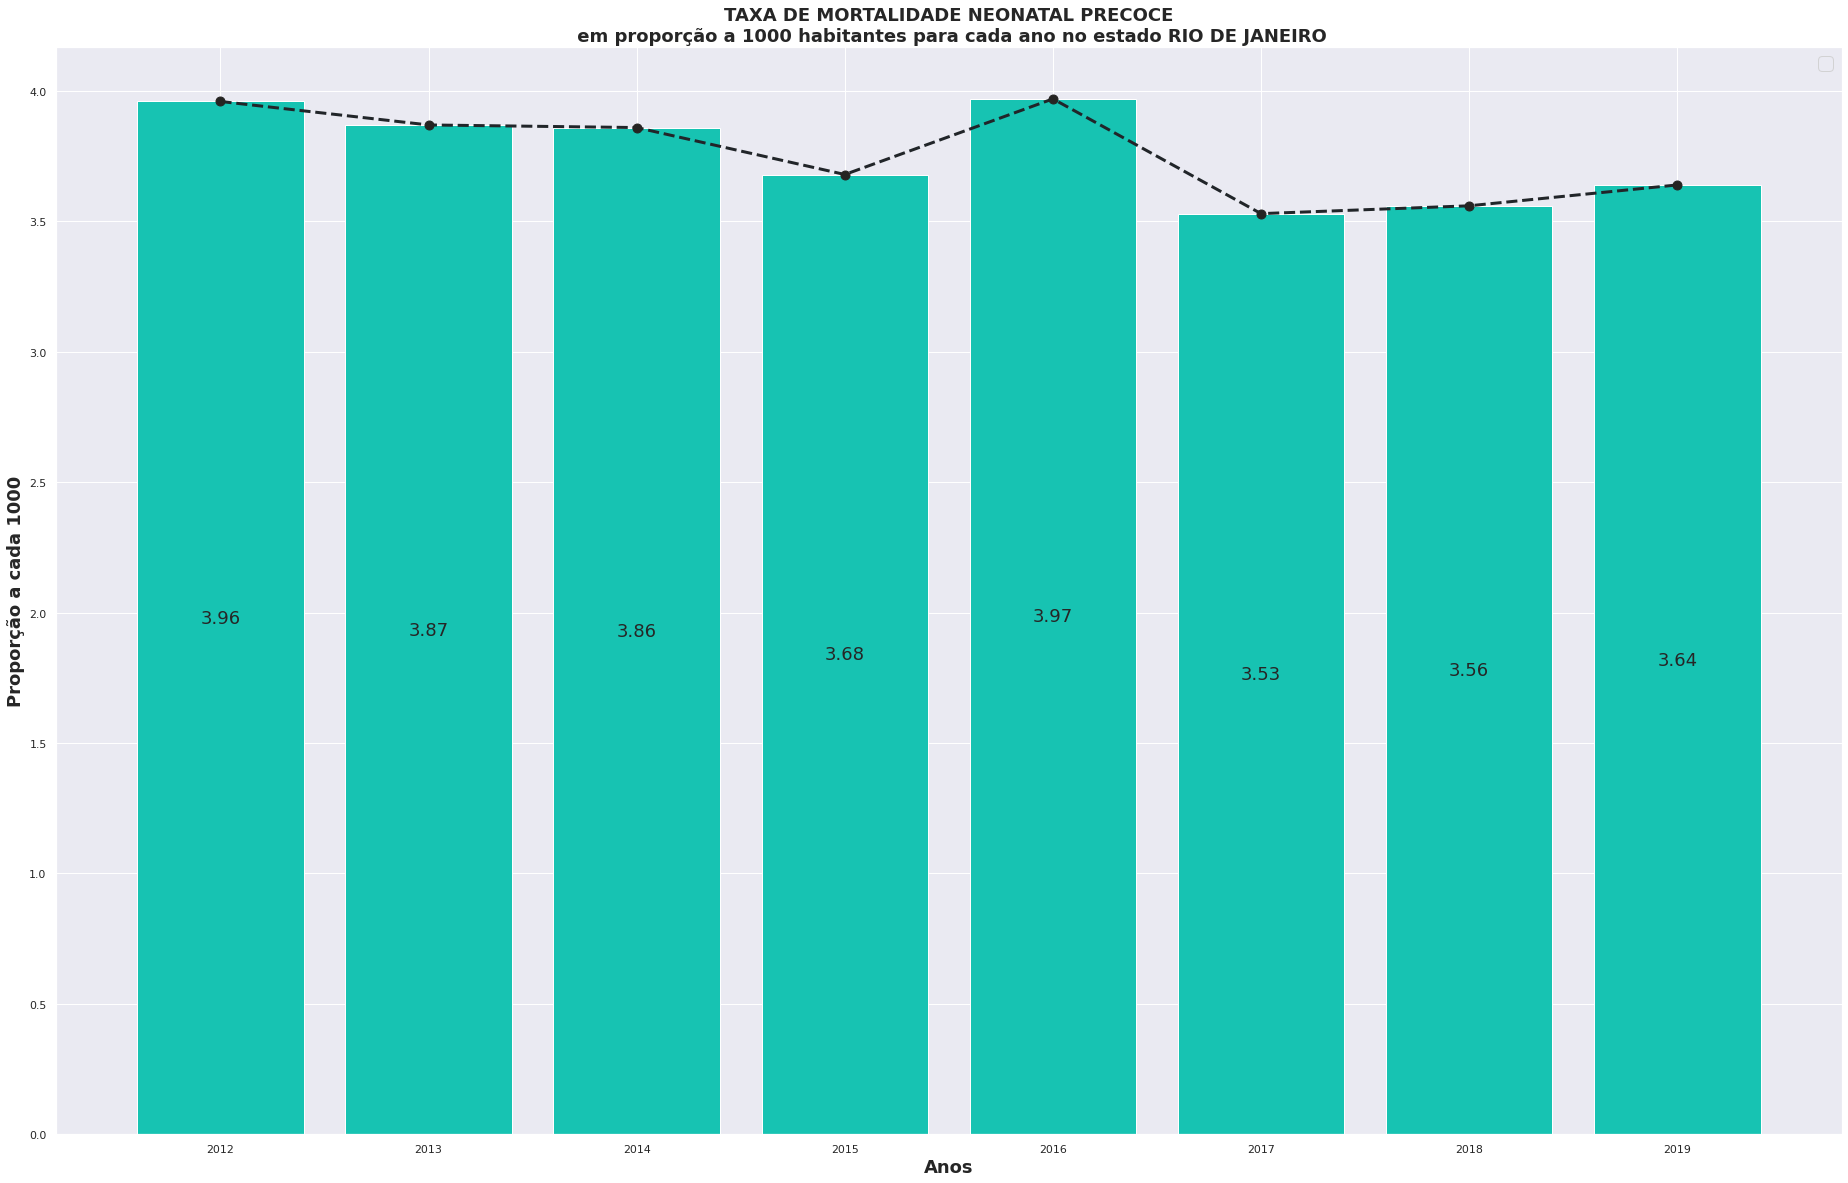

In [35]:
# Falta mostrar dentro desse gráfico a média Regional e Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(df_estado_acumulado[ano], np.round(df_estado_acumulado[ratio],decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529')

#p1 = ax.bar(df_estado_acumulado[ano],  np.round(100 - 100*df_estado_acumulado[ratio], decimals=2) , bottom= np.round(100*df_estado_acumulado[ratio], decimals=2), color ='#EEEDE7', label = 'Fora do indicador')
p2 = ax.bar(df_estado_acumulado[ano],  np.round(df_estado_acumulado[ratio], decimals=2), color ='#17c3b2' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em proporção a 1000 habitantes para cada ano no estado " + nome_estado, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Proporção a cada 1000',**font)

#ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center", fontsize = 18 )
ax.legend(loc='upper right', fontsize = 18 )
plt.savefig('./Imagens/10-grafico2', bbox_inches='tight')
plt.show()

### Plot em Stacked Bar da região que o município escolhido pertence considerando as proporções

In [36]:
norte =         subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '1') ]
nordeste =      subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '2') ]
sudeste =       subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '3') ]
sul =           subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '4') ]
centro_oeste =  subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '5') ]

print(sudeste)
sudeste.to_csv('./csv_files/37-sudeste.csv',index=False)

      CODMUNRES   Ano  Qtd_Neonatal_Precoce  Qtd_Total      Ratio
17952    310010  2012                     1         68  14.705882
17953    310010  2013                     0         57   0.000000
17954    310010  2014                     0         71   0.000000
17955    310010  2015                     0         53   0.000000
17956    310010  2016                     0         59   0.000000
...         ...   ...                   ...        ...        ...
31291    355715  2015                     0         33   0.000000
31292    355715  2016                     0         28   0.000000
31293    355715  2017                     0         24   0.000000
31294    355715  2018                     0         25   0.000000
31295    355715  2019                     0         25   0.000000

[13344 rows x 5 columns]


In [39]:
def acumula(dataframe):
    anos = np.array(dataframe[ano][:8]).astype(int)

    soma_anos_total = np.zeros(8).astype(int)
    for i in range(8):
        soma_anos_total[i] = dataframe.loc[dataframe[ano]==anos[i], total ].sum()

    soma_anos_indicador = np.zeros(8).astype(int)
    for i in range(8):
        soma_anos_indicador[i] = dataframe.loc[dataframe[ano]==anos[i], indicador ].sum()

    list_of_tuples = list(zip(anos,soma_anos_indicador, soma_anos_total, np.round(soma_anos_indicador/soma_anos_total *1000,2)))
    acumulado = pd.DataFrame(list_of_tuples,columns=[ano,indicador,total,ratio])
    
    return acumulado

In [40]:
norte_acumulado = acumula(norte)
#norte_acumulado.insert(loc=0,column='CODREGIAO',value=[1,1,1,1,1,1,1,1])
norte_acumulado.insert(loc=0,column='NOMEREGIAO',value='Norte')

nordeste_acumulado = acumula(nordeste)
#nordeste_acumulado.insert(loc=0,column='CODREGIAO',value=[2,2,2,2,2,2,2,2])
nordeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Nordeste')

sudeste_acumulado = acumula(sudeste)
#sudeste_acumulado.insert(loc=0,column='CODREGIAO',value=[3,3,3,3,3,3,3,3])
sudeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Sudeste')


sul_acumulado = acumula(sul)
#sul_acumulado.insert(loc=0,column='CODREGIAO',value=[4,4,4,4,4,4,4,4])
sul_acumulado.insert(loc=0,column='NOMEREGIAO',value='Sul')


centro_oeste_acumulado = acumula(centro_oeste)
#centro_oeste_acumulado.insert(loc=0,column='CODREGIAO',value=[5,5,5,5,5,5,5,5])
centro_oeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Centro Oeste')


print(sudeste_acumulado)
print('\n',sul_acumulado)
print('\n',centro_oeste_acumulado)
print('\n',nordeste_acumulado)
print('\n',norte_acumulado)

  NOMEREGIAO   Ano  Qtd_Neonatal_Precoce  Qtd_Total  Ratio
0    Sudeste  2012                  4062    1152791   3.52
1    Sudeste  2013                  3959    1147576   3.45
2    Sudeste  2014                  4118    1182913   3.48
3    Sudeste  2015                  4040    1196195   3.38
4    Sudeste  2016                  3929    1127473   3.48
5    Sudeste  2017                  3803    1151817   3.30
6    Sudeste  2018                  3663    1146980   3.19
7    Sudeste  2019                  3556    1102964   3.22

   NOMEREGIAO   Ano  Qtd_Neonatal_Precoce  Qtd_Total  Ratio
0        Sul  2012                  1201     381658   3.15
1        Sul  2013                  1139     386978   2.94
2        Sul  2014                  1196     396460   3.02
3        Sul  2015                  1291     406526   3.18
4        Sul  2016                  1156     391789   2.95
5        Sul  2017                  1188     397595   2.99
6        Sul  2018                  1195     395857   

In [41]:
df_brasil_regiao = norte_acumulado.append(nordeste_acumulado).append(sudeste_acumulado).append(sul_acumulado).append(centro_oeste_acumulado)
df_brasil_regiao

,NOMEREGIAO,Ano,Qtd_Neonatal_Precoce,Qtd_Total,Ratio
0,Norte,2012,1504,308353,4.88
1,Norte,2013,1407,313216,4.49
2,Norte,2014,1500,321641,4.66
3,Norte,2015,1545,320890,4.81
4,Norte,2016,1389,307495,4.52
5,Norte,2017,1437,312660,4.60
6,Norte,2018,1479,319199,4.63
7,Norte,2019,1390,313678,4.43
0,Nordeste,2012,3808,832606,4.57
1,Nordeste,2013,3810,821427,4.64


In [42]:
cod_aux = str(subset_mun[coluna_codigo].iloc[0])[:1]

if (cod_aux == '1'):
    nome_regiao = 'Norte'
    regiao = norte
    regiao_acumulada = norte_acumulado
elif (cod_aux == '2'):
    nome_regiao = 'Nordeste'
    regiao = nordeste
    regiao_acumulada = nordeste_acumulado
elif (cod_aux == '3'):
    nome_regiao = 'Sudeste'
    regiao = sudeste
    regiao_acumulada = sudeste_acumulado
elif (cod_aux == '4'):
    nome_regiao = 'Sul'
    regiao = sul
    regiao_acumulada = sul_acumulado
elif (cod_aux == '5'):
    nome_regiao = 'Centro Oeste'
    regiao = centro_oeste
    regiao_acumulada = centro_oeste_acumulado
    
print(nome_regiao)
print(regiao)

Sudeste
      CODMUNRES   Ano  Qtd_Neonatal_Precoce  Qtd_Total      Ratio
17952    310010  2012                     1         68  14.705882
17953    310010  2013                     0         57   0.000000
17954    310010  2014                     0         71   0.000000
17955    310010  2015                     0         53   0.000000
17956    310010  2016                     0         59   0.000000
...         ...   ...                   ...        ...        ...
31291    355715  2015                     0         33   0.000000
31292    355715  2016                     0         28   0.000000
31293    355715  2017                     0         24   0.000000
31294    355715  2018                     0         25   0.000000
31295    355715  2019                     0         25   0.000000

[13344 rows x 5 columns]


In [43]:
regiao_acumulada[ano]

0    2012
1    2013
2    2014
3    2015
4    2016
5    2017
6    2018
7    2019
Name: Ano, dtype: int64

No handles with labels found to put in legend.


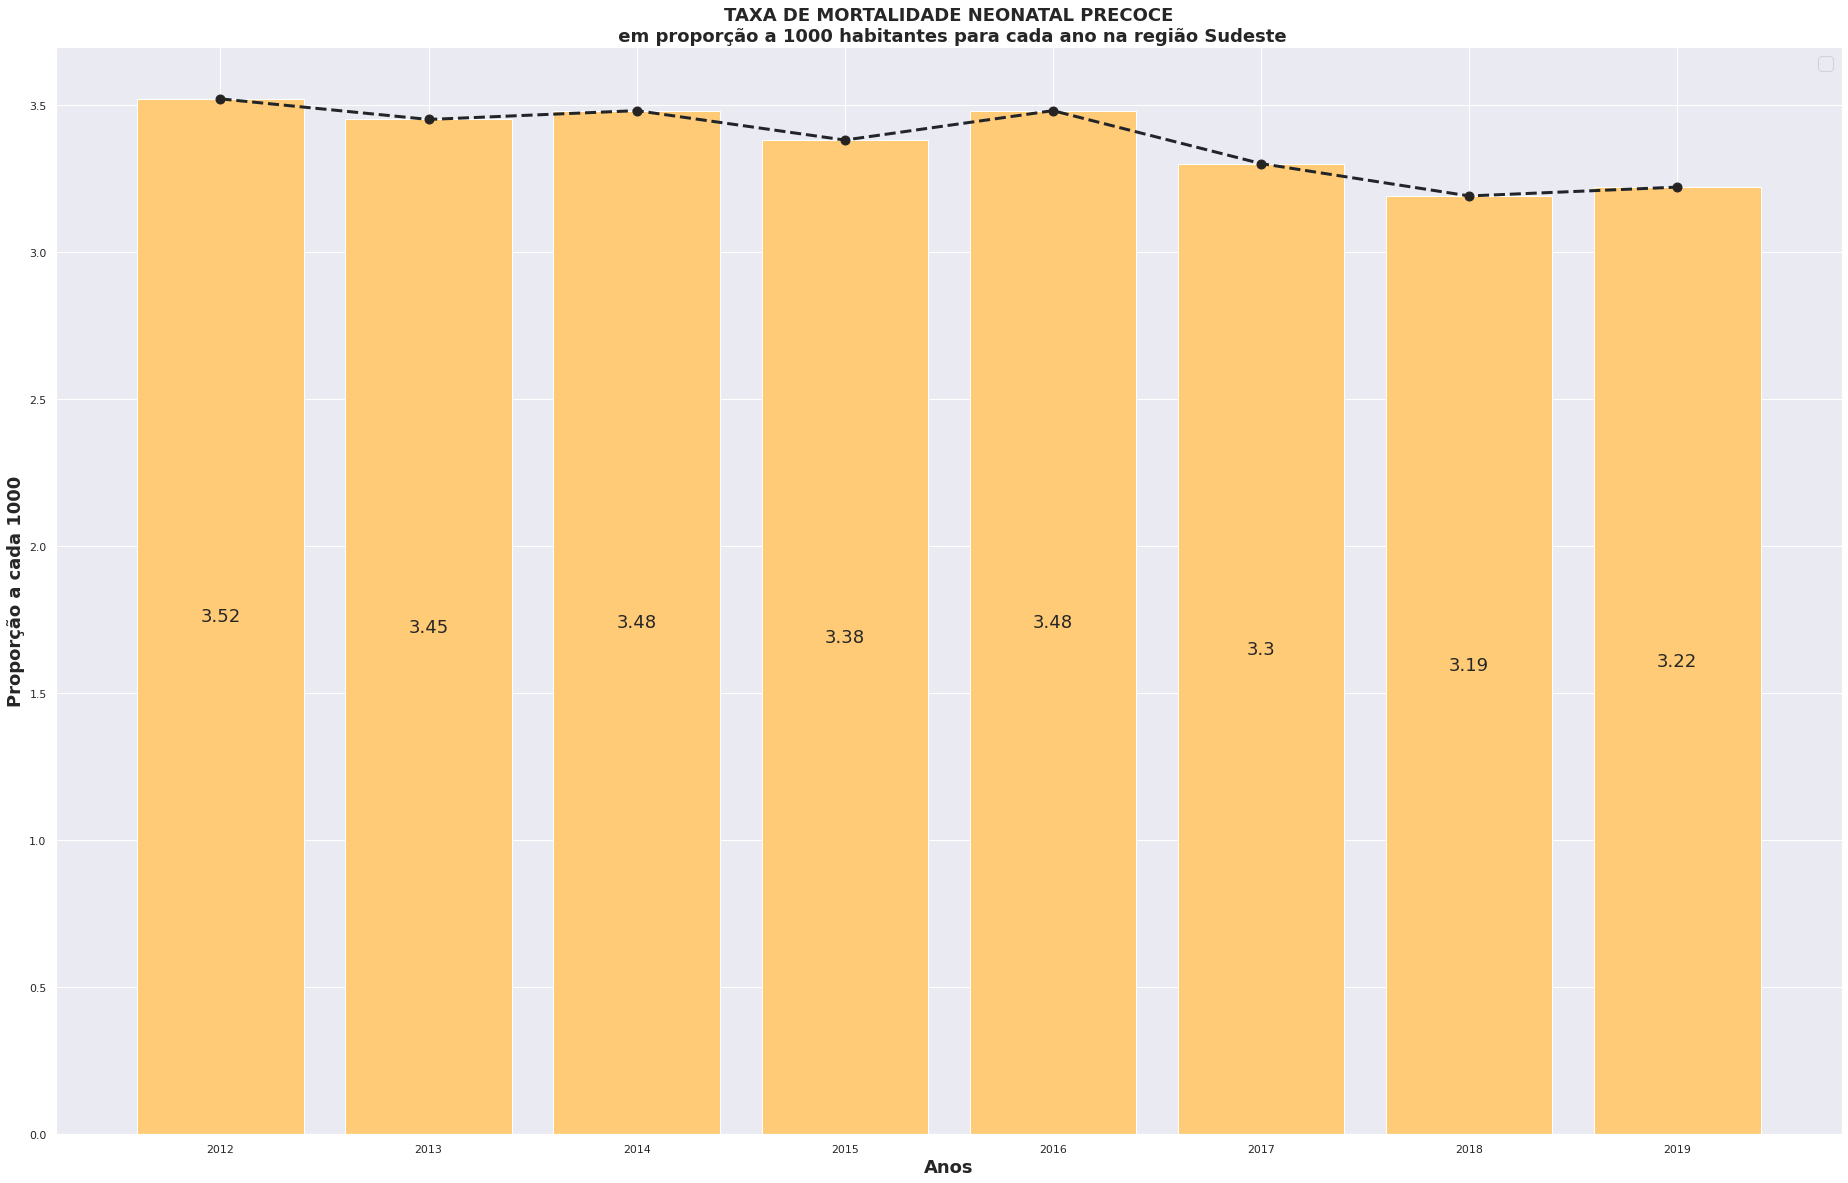

In [44]:
# Falta mostrar dentro desse gráfico a média Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(regiao_acumulada[ano], np.round(regiao_acumulada[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

#p1 = ax.bar(regiao_acumulada[ano],  np.round(100 - 100*regiao_acumulada[ratio], decimals=2) , bottom= np.round(100*regiao_acumulada[ratio], decimals=2), color ='#90ADC6', label = 'Fora do indicador')
p2 = ax.bar(regiao_acumulada[ano],  np.round(regiao_acumulada[ratio], decimals=2), color ='#ffcb77')

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em proporção a 1000 habitantes para cada ano na região " + nome_regiao, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Proporção a cada 1000',**font)

#ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center", fontsize = 18)
ax.legend(loc='upper right', fontsize = 18 )

plt.savefig('./Imagens/10-grafico3', bbox_inches='tight')
plt.show()

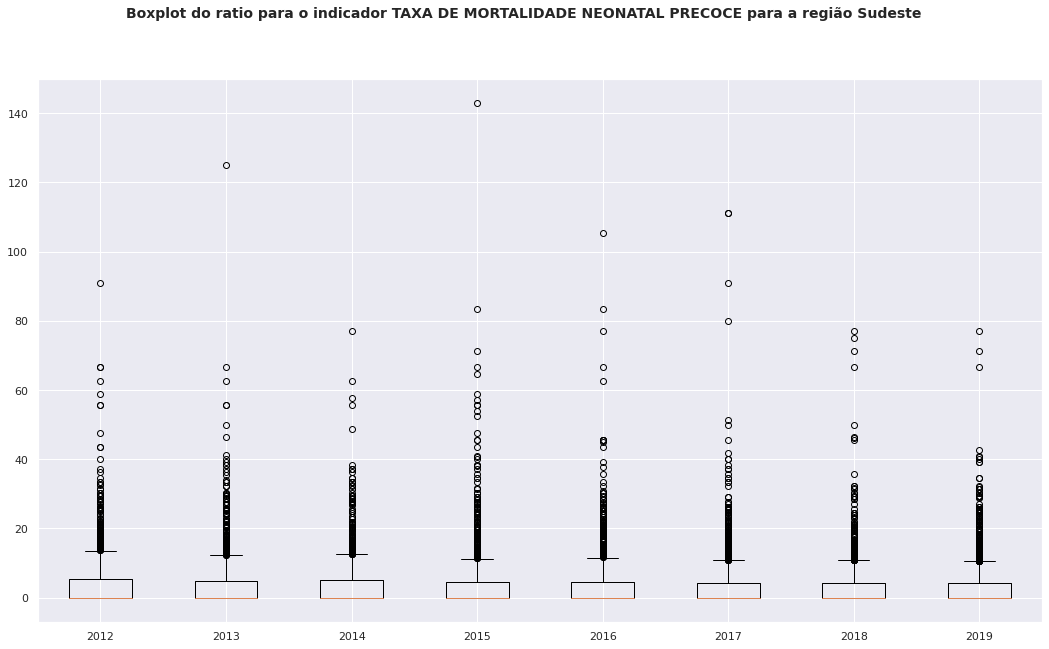

In [45]:
data_to_plot = [regiao[regiao[ano]==2012][ratio], regiao[regiao[ano]==2013][ratio],
                regiao[regiao[ano]==2014][ratio], regiao[regiao[ano]==2015][ratio],
                regiao[regiao[ano]==2016][ratio], regiao[regiao[ano]==2017][ratio],
                regiao[regiao[ano]==2018][ratio], regiao[regiao[ano]==2019][ratio]]

# Positions defaults to range(1, N+1) where N is the number of boxplot to be drawn.
# we will move them a little, to visually group them
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Boxplot do ratio para o indicador ' + nome_indicador + ' para a região ' + nome_regiao , fontsize=14, fontweight='bold')

box = plt.boxplot(data_to_plot,
                  positions=[1, 2, 3, 4, 5, 6, 7, 8],
                  labels=['2012','2013','2014','2015','2016','2017','2018','2019'])

## Gráficos por estado 

### Cálculo do acumulado para cada estado e país

In [46]:
# Dataframe dos municipios do estado escolhido
df_estado_municipios = subset_nao_ignorado.loc[ subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{2})', expand=False) == str(cod_estado) ] 
print(df_estado_municipios)

      CODMUNRES   Ano  Qtd_Neonatal_Precoce  Qtd_Total     Ratio
25400    330010  2012                    11       2698  4.077094
25401    330010  2013                     4       2653  1.507727
25402    330010  2014                     7       2838  2.466526
25403    330010  2015                    10       2872  3.481894
25404    330010  2016                     5       2628  1.902588
...         ...   ...                   ...        ...       ...
26131    330630  2015                     7       3439  2.035475
26132    330630  2016                    10       3364  2.972652
26133    330630  2017                     9       3272  2.750611
26134    330630  2018                    12       3376  3.554502
26135    330630  2019                     9       3096  2.906977

[736 rows x 5 columns]


In [47]:
df_brasil_acumulado = acumula(subset_nao_ignorado)
print(df_brasil_acumulado)

    Ano  Qtd_Neonatal_Precoce  Qtd_Total  Ratio
0  2012                 11463    2905676   3.95
1  2013                 11188    2903867   3.85
2  2014                 11296    2979133   3.79
3  2015                 11321    3017563   3.75
4  2016                 10614    2857704   3.71
5  2017                 10724    2923441   3.67
6  2018                 10439    2944826   3.54
7  2019                 10003    2849064   3.51


No handles with labels found to put in legend.


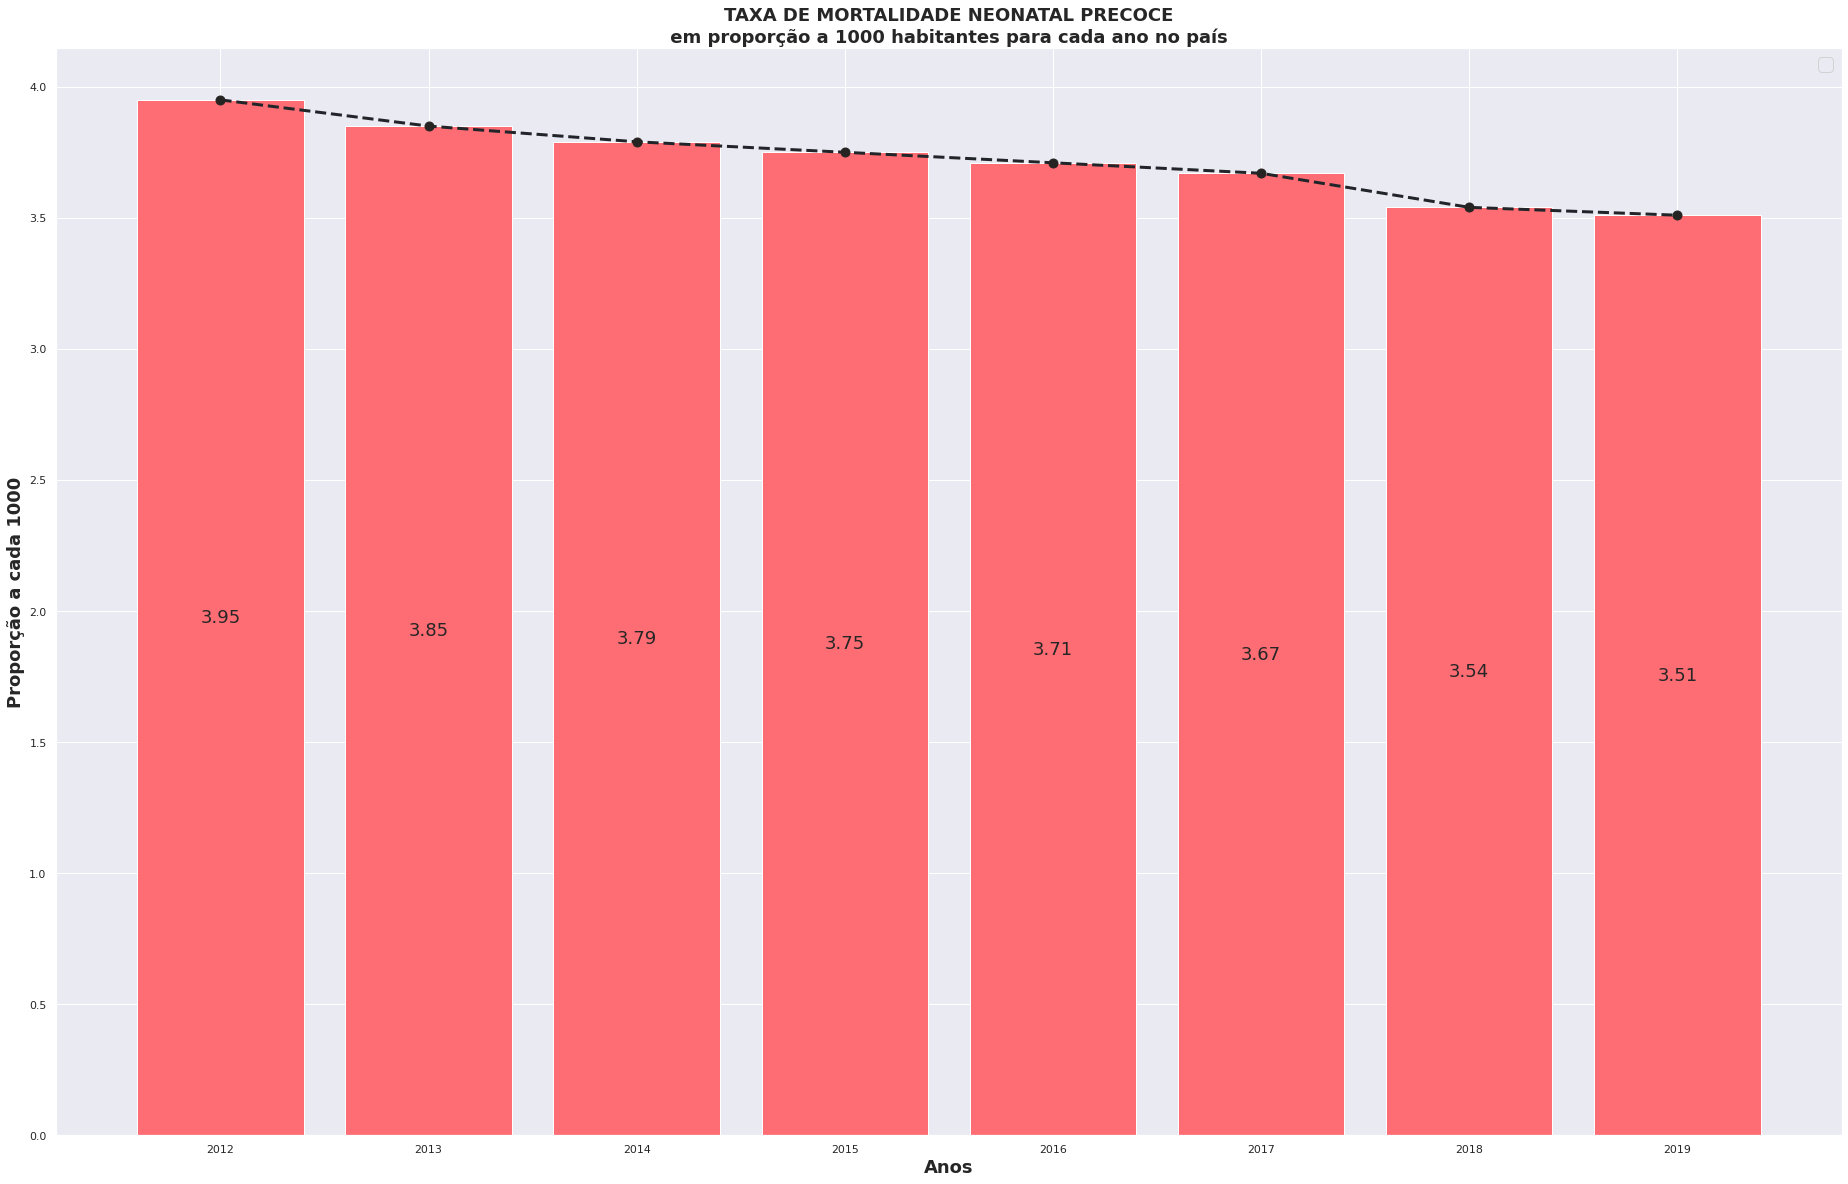

In [49]:
fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(df_brasil_acumulado[ano], np.round(df_brasil_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

#p1 = ax.bar(df_brasil_acumulado[ano],  np.round(100 - 100*df_brasil_acumulado[ratio], decimals=2) , bottom= np.round(100*df_brasil_acumulado[ratio], decimals=2), color ='#B1D8B7', label = 'Fora do indicador')
p2 = ax.bar(df_brasil_acumulado[ano],  np.round(df_brasil_acumulado[ratio], decimals=2), color ='#fe6d73' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

font_n = { 'family' : 'DejaVu Sans',
            'size'   : 18}

plt.title(nome_indicador + "\n em proporção a 1000 habitantes para cada ano no país ", **font)

plt.ylabel('Proporção a cada 1000',**font)

plt.xlabel('Anos',**font)
ax.bar_label(p2,label_type="center", fontsize = 18 )
ax.legend(loc='upper right', fontsize = 18 )
plt.savefig('./Imagens/10-grafico4', bbox_inches='tight')
plt.show()

In [50]:
df_brasil_por_estado = df_grouped_by_state
print(df_brasil_por_estado)

     COD_UF   Ano  Qtd_Neonatal_Precoce  Qtd_Total  Ratio
0        11  2012                   116      26511   4.38
1        11  2013                    91      27081   3.36
2        11  2014                   112      27556   4.06
3        11  2015                   136      27914   4.87
4        11  2016                    91      26600   3.42
..      ...   ...                   ...        ...    ...
211      53  2015                   135      46122   2.93
212      53  2016                   120      43340   2.77
213      53  2017                   143      44568   3.21
214      53  2018                   146      44195   3.30
215      53  2019                   112      42422   2.64

[216 rows x 5 columns]


### Gráfico do município mostrando também as médias Brasil Estadual e Regional para cada ano

No handles with labels found to put in legend.


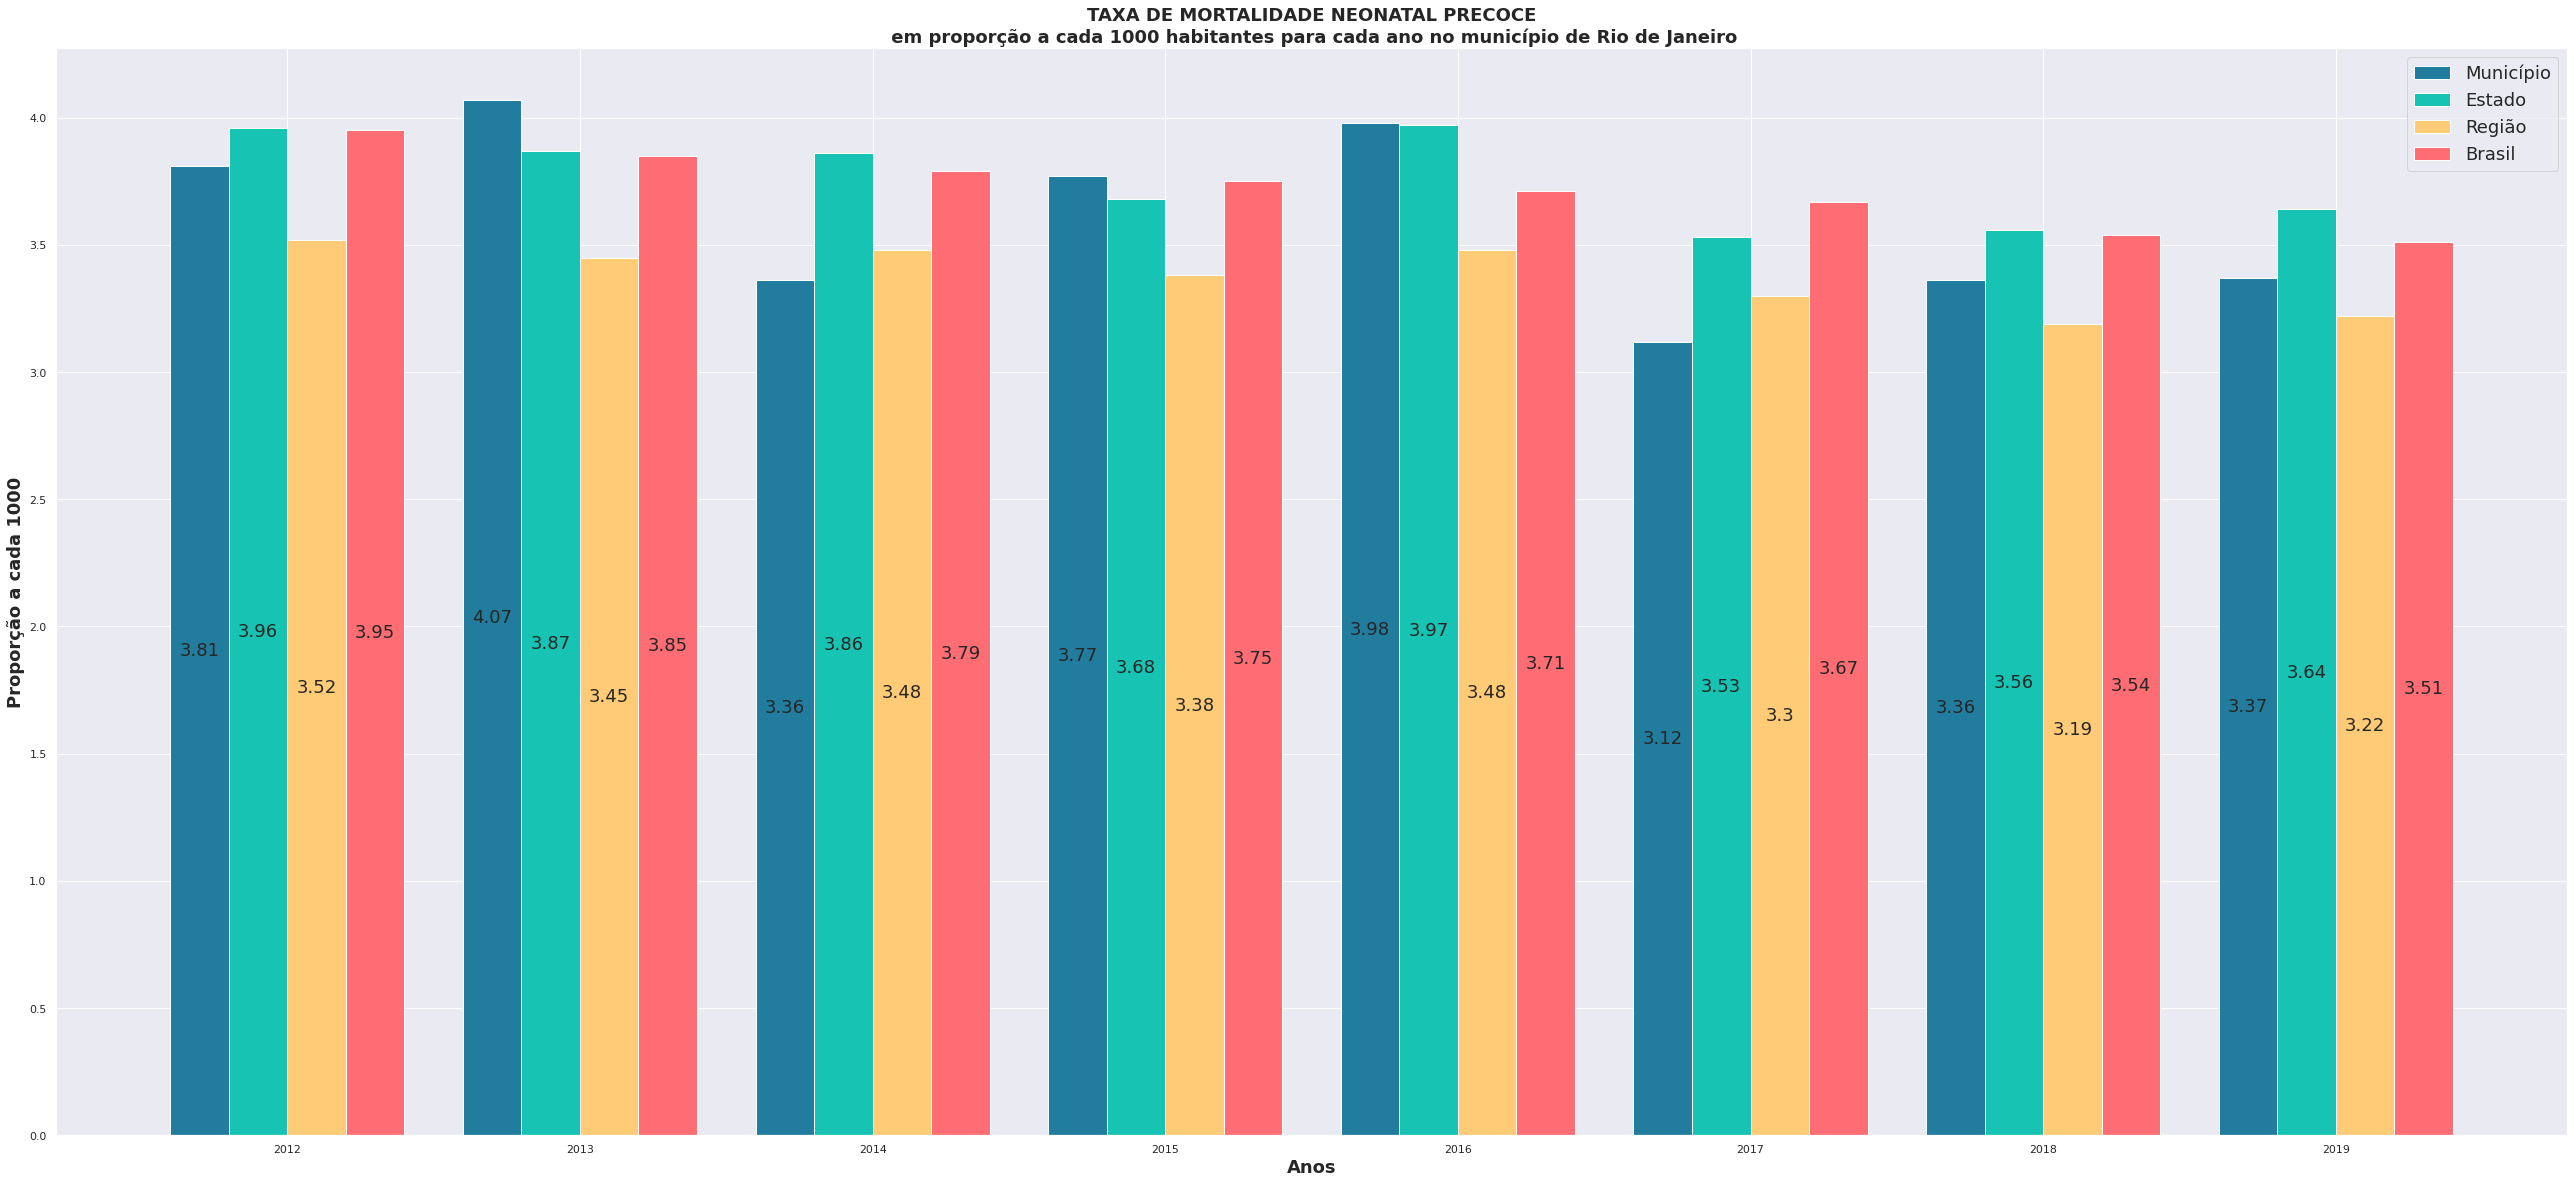

In [52]:
fig, ax = plt.subplots(figsize=(45, 20))

'''
plt.plot(subset_mun[ano], np.round(subset_mun[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529', label = 'Municipio' ) # Municipio
plt.plot(df_estado_acumulado[ano], np.round(df_estado_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#2FF3E0',mfc='#2FF3E0',linewidth=3,color='#2FF3E0' , label = 'Estado' ) # Estado
plt.plot(regiao_acumulada[ano], np.round(regiao_acumulada[ratio], decimals=2),'.--',markersize=18,mec='#F8D210',mfc='#F8D210',linewidth=3,color='#F8D210' , label = 'Região' ) # Região
plt.plot(df_brasil_acumulado[ano], np.round(df_brasil_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#FA26A0',mfc='#FA26A0',linewidth=3,color='#FA26A0', label = 'Brasil'  ) # Brasil
'''

plt.legend(loc='upper left', fontsize = 18 )

p1 = ax.bar(subset_mun[ano]-0.3,  np.round(subset_mun[ratio], decimals=2), color ='#227c9d', label = 'Município',width=0.2 )
p2 = ax.bar(subset_mun[ano]-0.1,  np.round(df_estado_acumulado[ratio], decimals=2), color ='#17c3b2', label = 'Estado',width=0.2 )
p3 = ax.bar(subset_mun[ano]+0.1,  np.round(regiao_acumulada[ratio], decimals=2), color ='#ffcb77', label = 'Região',width=0.2 )
p4 = ax.bar(subset_mun[ano]+0.3,  np.round(df_brasil_acumulado[ratio], decimals=2) , color ='#fe6d73', label = 'Brasil',width=0.2)

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

font_n = {'family' : 'DejaVu Sans',
        #'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em proporção a cada 1000 habitantes para cada ano no município de " + nome_municipio, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Proporção a cada 1000',**font)

#if(subset_mun[total].mean()<100):
 #   plt.text(0.03, 1.1, 'Esse município possui em média menos de 100 registros em cada ano', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.bar_label(p1,label_type="center",**font_n)
ax.bar_label(p2,label_type="center",**font_n)
ax.bar_label(p3,label_type="center",**font_n)
ax.bar_label(p4,label_type="center",**font_n)

ax.legend(loc='upper right', fontsize = 18 )

plt.savefig('./Imagens/10-grafico5', bbox_inches='tight')
plt.show()

### Boxplot de todos os municípios de um estado em cada ano, lado a lado

Escolhemos um indicador, então um gráfico contendo os boxplot de cada ano é gerado para um estado em específico, nesse gráfico também está contida a informação de qual é a média mediana do estado. Além de indicar em qual quartil o estado se encontra em relação ao país (vale revisar se essa informação deveria estar aqui)

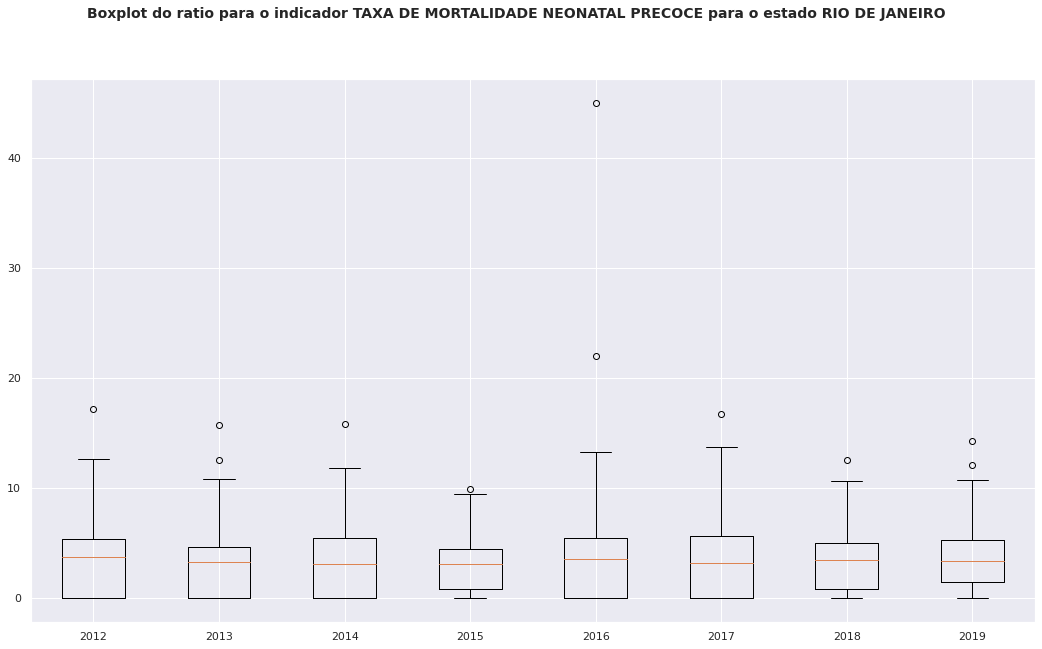

In [53]:
data_to_plot = [df_estado_municipios[df_estado_municipios[ano]==2012][ratio], df_estado_municipios[df_estado_municipios[ano]==2013][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2014][ratio], df_estado_municipios[df_estado_municipios[ano]==2015][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2016][ratio], df_estado_municipios[df_estado_municipios[ano]==2017][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2018][ratio], df_estado_municipios[df_estado_municipios[ano]==2019][ratio]]

# Positions defaults to range(1, N+1) where N is the number of boxplot to be drawn.
# we will move them a little, to visually group them
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Boxplot do ratio para o indicador ' + nome_indicador + ' para o estado ' + nome_estado , fontsize=14, fontweight='bold')

box = plt.boxplot(data_to_plot,
                  positions=[1, 2, 3, 4, 5, 6, 7, 8],
                  labels=['2012','2013','2014','2015','2016','2017','2018','2019'])

### Gráfico em barras do acumulado de cada estado em um ano, com cada estado lado a lado

In [54]:
subset_ano = subset_nao_ignorado[ subset_nao_ignorado[ano] == ano_esc ]
subset_ano.head()

,CODMUNRES,Ano,Qtd_Neonatal_Precoce,Qtd_Total,Ratio
4,110001,2016,1,326,3.067485
12,110037,2016,0,168,0.000000
20,110040,2016,2,220,9.090909
28,110034,2016,0,166,0.000000
36,110002,2016,5,1662,3.008424


In [55]:
df_brasil_por_estado
df_brasil_por_estado_e_ano = df_brasil_por_estado[df_brasil_por_estado[ano]==ano_esc]
df_brasil_por_estado_e_ano.head(10)

,COD_UF,Ano,Qtd_Neonatal_Precoce,Qtd_Total,Ratio
4,11,2016,91,26600,3.42
12,12,2016,45,15773,2.85
20,13,2016,288,76678,3.76
28,14,2016,55,11375,4.84
36,15,2016,720,137679,5.23
44,16,2016,98,15521,6.31
52,17,2016,92,23869,3.85
60,21,2016,477,110489,4.32
68,22,2016,236,46986,5.02
76,23,2016,452,126245,3.58


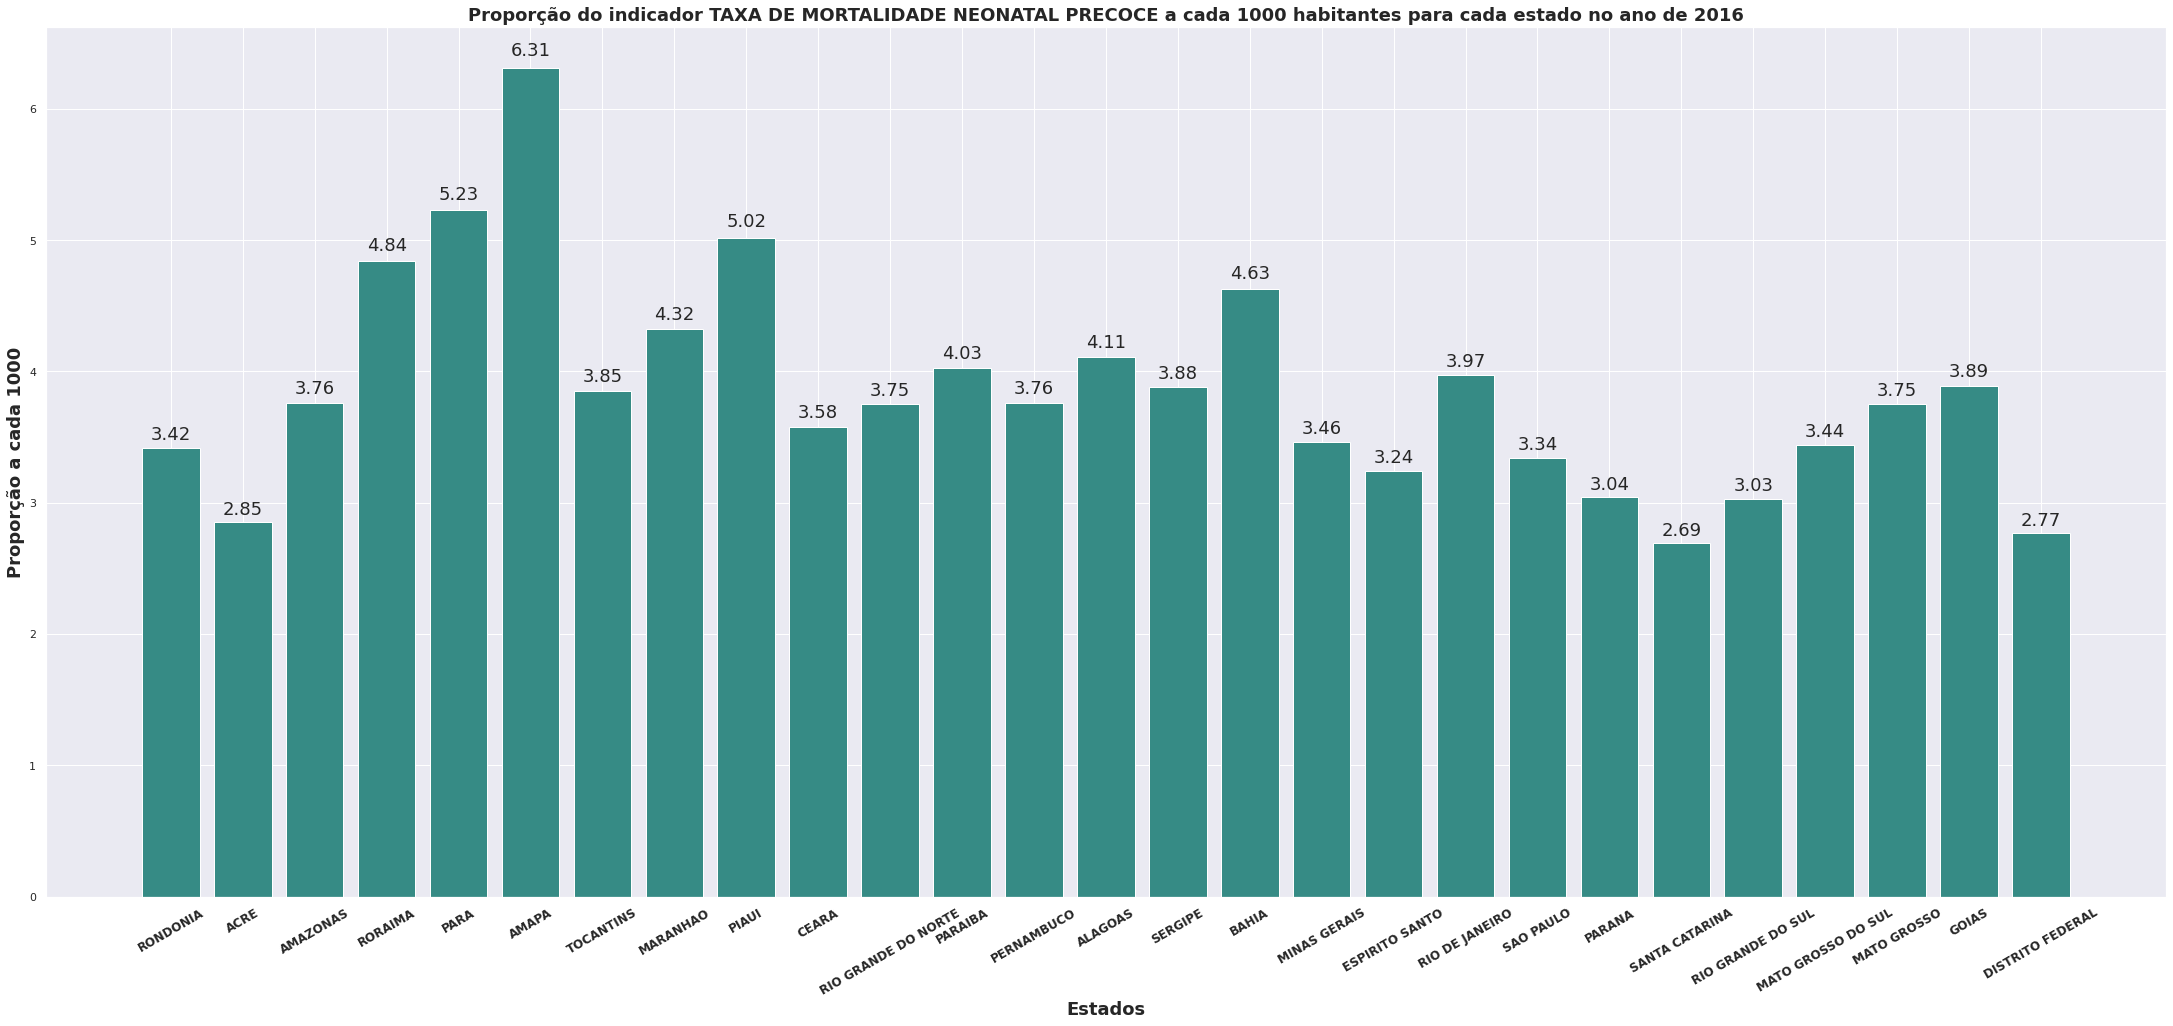

In [56]:
estados = df_estados['res_NOME_UF'].values

plt.figure(figsize=(38, 16))

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

font_label = {'family' : 'DejaVu Sans',
              'weight' : 'bold',
              'size'   : 12}


plt.title("Proporção do indicador " + nome_indicador +" a cada 1000 habitantes para cada estado no ano de " + str(ano_esc),**font)
plt.xlabel('Estados',**font)
plt.ylabel('Proporção a cada 1000',**font)


#plt.bar(df_brasil_por_estado['COD_UF'],100*df_brasil_por_estado[df_brasil_por_estado[ano]==ano_esc]['ratio'], color ='#3458FF') #TODO
#plt.show()
estado_ = df_estados["res_NOME_UF"].values
merge1 = pd.merge(df_brasil_por_estado_e_ano, df_estados ,on=["COD_UF"])
#print(merge1.head(27))
y_pos = range(27)
grafico = plt.bar(merge1['res_NOME_UF'],merge1[ratio] , color ='#368B85')
for i in grafico:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom',fontsize=18)

plt.xticks(y_pos, merge1['res_NOME_UF'], rotation=30,**font_label)

plt.savefig('./Imagens/10-grafico6', bbox_inches='tight')
plt.show()

### Gerar um gráfico semelhante ao acima, porém com as regiões lado a lado

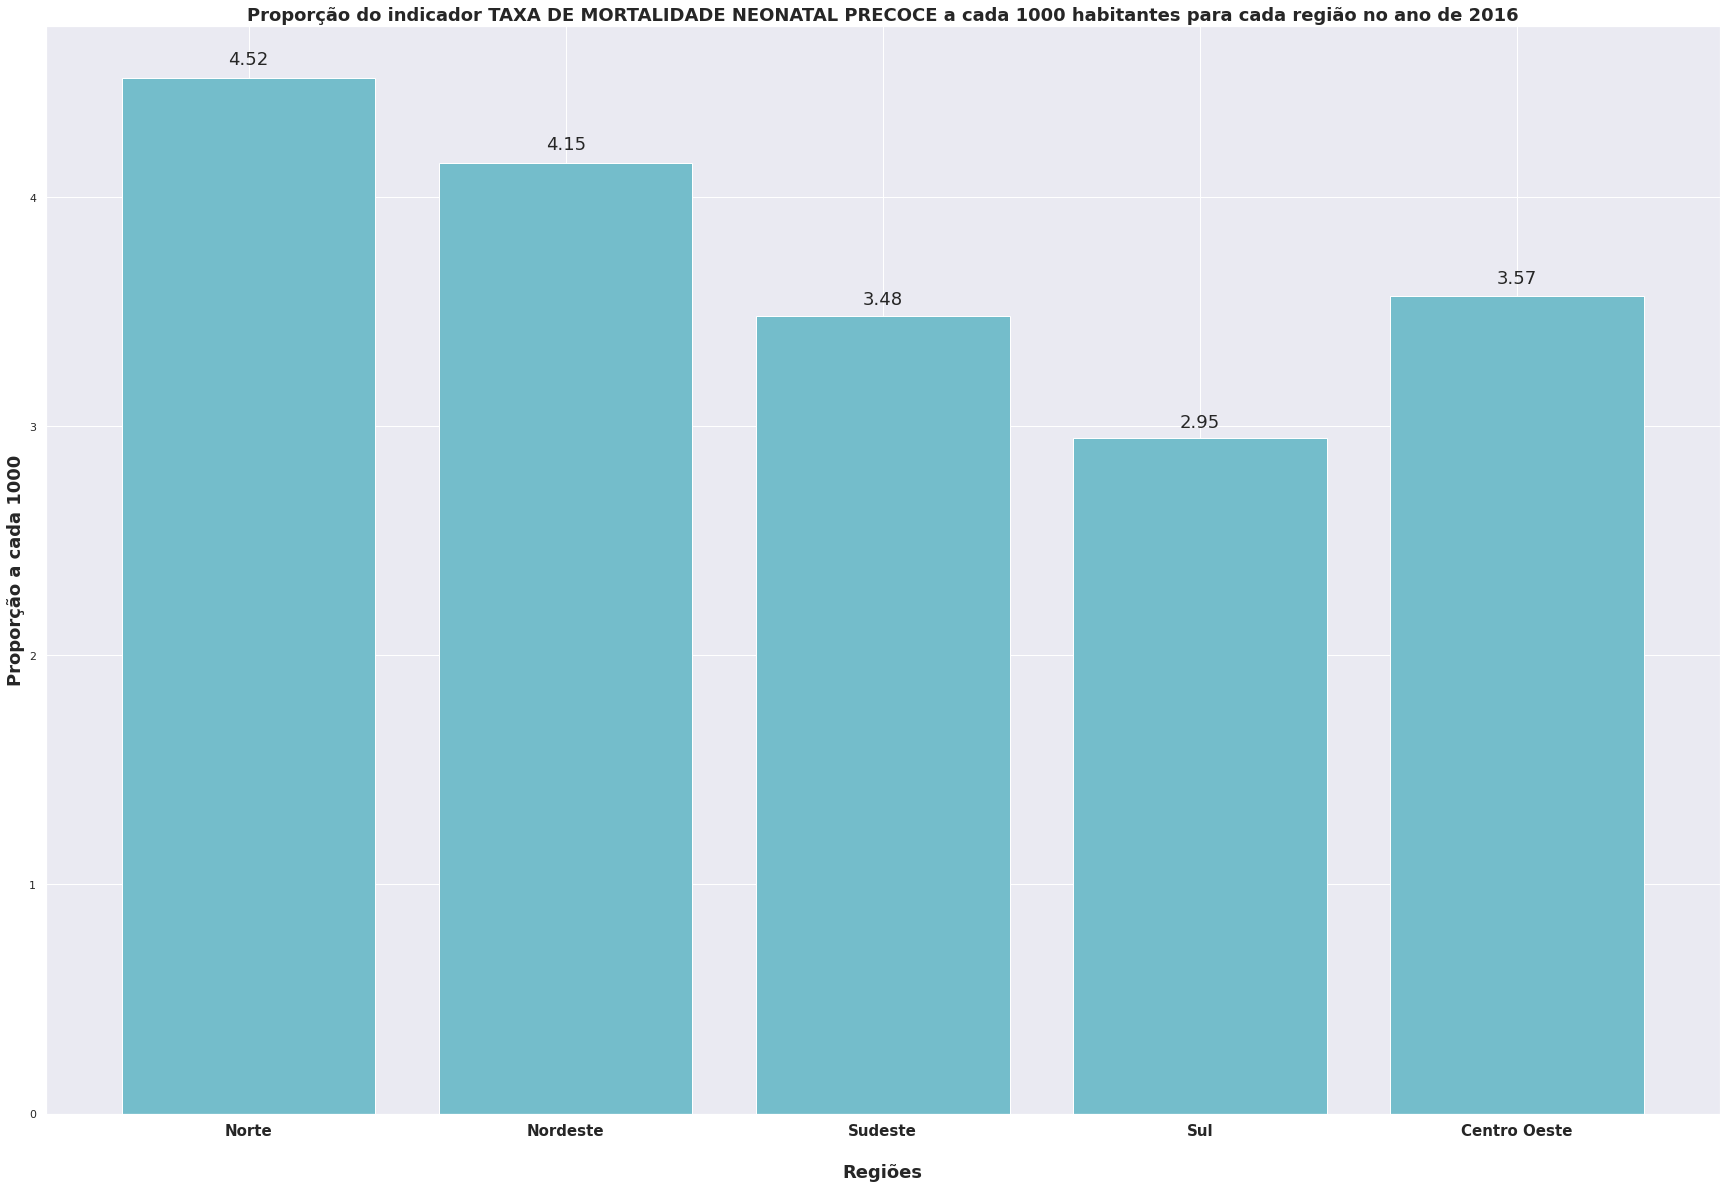

In [57]:
plt.figure(figsize=(30, 20))

aux = df_brasil_regiao[df_brasil_regiao[ano]==ano_esc]

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

font_label = {'family' : 'DejaVu Sans',
              'weight' : 'bold',
              'size'   : 15}


plt.title("Proporção do indicador " + nome_indicador +" a cada 1000 habitantes para cada região no ano de " + str(ano_esc),**font)
plt.xlabel('\nRegiões',**font)
plt.ylabel('Proporção a cada 1000',**font)

y_pos = range(5)
grafico = plt.bar(aux['NOMEREGIAO'],aux[ratio] , color ='#74BDCB')
for i in grafico:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom',fontsize=18)

plt.xticks(y_pos, aux['NOMEREGIAO'], rotation=0,**font_label)

plt.savefig('./Imagens/10-grafico7', bbox_inches='tight')
plt.show()

# Refazer as médias

In [172]:
#Mediana e quartil 
df_para_data_selecionada = df_brasil_por_estado[df_brasil_por_estado[ano] ==  ano_esc]

Media_total = df_para_data_selecionada[total].mean()
Mediana_total = df_para_data_selecionada[total].median()

#0.25 1st quartile(lower), 0.5 2nd quartile or median(mid), 0.75 3rd quartile(upper)
Quartil_total = df_para_data_selecionada[indicador].quantile([0.25,0.5,0.75])

Media_indicador = df_para_data_selecionada[indicador].mean()
Mediana_indicador = df_para_data_selecionada[indicador].median()

#0.25 1st quartile(lower), 0.5 2nd quartile or median(mid), 0.75 3rd quartile(upper)
Quartil_indicador = df_para_data_selecionada[indicador].quantile([0.25,0.5,0.75])

#print(df_brasil_por_estado)
print()
print("Media estadual do número total de registros feitos nesse ano (" ,ano_esc,"), no Brasil: ", float(Media_total))
print("Mediana do total de registros feitos nesse ano (" ,ano_esc,"), entre os estados do Brasil: ", float(Mediana_total))
print("Quartis do total de registros feitos nesse ano (" ,ano_esc,"), entre os estados do Brasil:\n",Quartil_total)
#------------------------------------------------
print()
print("Media estadual do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no Brasil: ", float(Media_indicador))
print("Mediana do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") entre os estados do Brasil: ", float(Mediana_indicador))
print("Quartis do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") entre os estados do Brasil:\n",Quartil_indicador)
print()
print('Dataframe agrupado por estado no ano de ',ano_esc,'\n')
print(df_para_data_selecionada)


Media estadual do número total de registros feitos nesse ano ( 2019 ), no Brasil:  105520.88888888889
Mediana do total de registros feitos nesse ano ( 2019 ), entre os estados do Brasil:  58852.0
Quartis do total de registros feitos nesse ano ( 2019 ), entre os estados do Brasil:
 0.25    12.0
0.50    22.0
0.75    47.0
Name: Qtd_Morte_Materna_Direta, dtype: float64

Media estadual do número de registros dentro do indicador RAZAO MORTALIDADE MATERNA DIRETA BRASIL  feito nesse ano ( 2019 ) no Brasil:  38.44444444444444
Mediana do número de registros dentro do indicador RAZAO MORTALIDADE MATERNA DIRETA BRASIL  feito nesse ano ( 2019 ) entre os estados do Brasil:  22.0
Quartis do número de registros dentro do indicador RAZAO MORTALIDADE MATERNA DIRETA BRASIL  feito nesse ano ( 2019 ) entre os estados do Brasil:
 0.25    12.0
0.50    22.0
0.75    47.0
Name: Qtd_Morte_Materna_Direta, dtype: float64

Dataframe agrupado por estado no ano de  2019 

     COD_UF   Ano  Qtd_Morte_Materna_Direta 

In [173]:
#média de município do país inteiro: numero total de registros em um ano no brasil / numero total de municípios que foram contabilizados no pais
df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_total_mun_pais=df_aux[total]/numero_municipios_pais # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de total de registros feito nesse ano (", ano_esc, ") no Brasil: ", float(media_total_mun_pais))

df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_indicador_mun_pais=df_aux[indicador]/numero_municipios_pais # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no Brasil: ",  float(media_indicador_mun_pais))

NameError: name 'numero_municipios_pais' is not defined

In [174]:
#média de município do estado: numero total de registros em um ano no estado / numero total de municípios que foram contabilizados no estado
#média de município do país inteiro: numero total de registros em um ano no brasil / numero total de municípios que foram contabilizados no pais
df_aux=df_estado_acumulado[df_estado_acumulado[ano]==ano_esc]
media_total_mun_pais=df_aux[total]/numero_municipios_estado # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de total de registros feito nesse ano (", ano_esc, ") no estado", nome_estado, ": ", float(media_total_mun_pais))

df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_indicador_mun_pais=df_aux[indicador]/numero_municipios_estado # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no estado", nome_estado, ": ",  float(media_indicador_mun_pais))


Media municipal do número de total de registros feito nesse ano ( 2019 ) no estado RIO DE JANEIRO :  2260.5
Media municipal do número de registros dentro do indicador RAZAO MORTALIDADE MATERNA DIRETA BRASIL  feito nesse ano ( 2019 ) no estado RIO DE JANEIRO :  11.282608695652174


In [304]:
# Médias regionais

## Describe por Estado

Dados do país inteiro considerando as proporções de cada estado (em todos os anos)

In [175]:
df_aux = df_brasil_por_estado[['COD_UF', 'Ratio']]
df_to_describe = df_aux.groupby(['COD_UF']).mean()
#df_to_describe.sort_values('Ratio',ascending=False)
aux = df_to_describe.describe()
df_to_describe['Ratio'].quantile([0.25,0.5,0.75])
aux

,Ratio
count,27.000000
mean,0.000421
std,0.000111
min,0.000215
25%,0.000356
50%,0.000426
75%,0.000443
max,0.000678


In [176]:
df_to_describe

,Ratio
COD_UF,
11,0.000431
12,0.000430
13,0.000497
14,0.000501
15,0.000595
16,0.000600
17,0.000427
21,0.000678
22,0.000606


## Describe por Município

Dados do país inteiro considerando as proporções de cada município (em todos os anos)

In [102]:
df_aux = subset_nao_ignorado[['CODMUNRES', 'Ratio']]
df_to_describe = df_aux.groupby(['CODMUNRES']).mean()
df_to_describe.describe()

,Ratio
count,5570.000000
mean,0.377795
std,0.256673
min,0.000000
25%,0.174540
50%,0.335565
75%,0.553026
max,1.000000


## Describe No Estado

Dados do estado escolhido (Rio de Janeiro) considerando as proporções de cada município (em todos os anos)


In [1863]:
df_aux = df_estado_municipios[['CODMUNRES', 'Ratio']]
df_to_describe = df_aux.groupby(['CODMUNRES']).mean()
descricao = df_to_describe.describe()
print(descricao)
print(descricao.at['25%','Ratio'])

#len_25 = len(df_estado_municipios[df_estado_municipios[ratio]<= ])

           Ratio
count  92.000000
mean    0.568746
std     0.122096
min     0.301044
25%     0.490306
50%     0.569489
75%     0.638572
max     0.838296
0.4903064131515108


## Gráfico de Pizza para visualizar a proporção de municípios e estados em cada quartil (vamos ver os quartis do país e do estado) além de indicar em qual quartil o município e estado escolhido se encontram

In [1864]:
# '330455'
df_to_describe

,Ratio
CODMUNRES,
330010,0.521980
330015,0.362003
330020,0.660029
330022,0.555678
330023,0.583531
330025,0.540441
330030,0.613840
330040,0.528183
330045,0.794408


In [1865]:
df_estado_municipios

,CODMUNRES,ano_nasc,Qtd_2ou4Racacor,Qtd_Total,Ratio
25495,330010,2012,1246,2698,0.461824
25496,330010,2013,1054,2653,0.397286
25497,330010,2014,1374,2838,0.484144
25498,330010,2015,1514,2872,0.527159
25499,330010,2016,1422,2628,0.541096
...,...,...,...,...,...
26226,330630,2015,1503,3439,0.437046
26227,330630,2016,1392,3364,0.413793
26228,330630,2017,1454,3272,0.444377
26229,330630,2018,1458,3376,0.431872


In [1866]:
len_25 = len(df_to_describe[df_to_describe[ratio]<= descricao.at['25%','Ratio']])
len_50 = len(df_to_describe[df_to_describe[ratio]<= descricao.at['25%','Ratio']])
len_75 = len(df_to_describe[df_to_describe[ratio]>= descricao.at['75%','Ratio']])

len_75

23